In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [78]:
df = pd.read_csv('Earthquakes_database.csv');
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


1. (L6 – 3 ქულა) გამოიყენეთ მონაცემთა წმედის რომელიმე ფუნქციონალი (მაგ. რომელიმე სვეტის მონაცემები
გადაანაწილეთ რამდენიმე ახალ სვეტად, წაშალეთ რომელიმე სვეტი, ცარიელი მნიშვნელობებისთვის
გამოიყენეთ სასურველი ფორმატი, ა.შ.)

In [79]:
# 1. Split the 'Date' column into 'Year', 'Month', and 'Day' columns
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)

# Fill missing values in 'Year' with a placeholder
df['Year'].fillna(0, inplace=True)  # Filling with 0 as a placeholder
df['Year'] = df['Year'].astype(int)

# 2. Drop the 'Time' column
df = df.drop(columns=['Time'])

# 3. Fill NaN values in the 'Depth' column with the mean depth
mean_depth = df['Depth'].mean()
df['Depth'].fillna(mean_depth, inplace=True)

# Display the modified dataframe
df.head()

,Date,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year
0,1/2/1965,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965
1,1/4/1965,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965
2,1/5/1965,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965
3,1/8/1965,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965
4,1/9/1965,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965


2. (L7 – 3 ქულა) რიცხვითი ტიპის ველის მონაცემები დაყავით კატეგორიებად cut() ფუნქციის გამოყენებით (მაგ.
ასაკის ველი 3 კატეგორიად „Children”, “Adolescent”, “Old”). შესაბამისად დაამატეთ კატეგორიის სვეტი.

In [80]:
# Categorize the 'Magnitude' field
bins = [0, 4.5, 6.5, 10]  # Define the bin edges
labels = ['Low', 'Medium', 'High']  # Define the labels for the bins
df['Magnitude_Category'] = pd.cut(df['Magnitude'], bins=bins, labels=labels, right=False)

df.head()

,Date,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Day,Year,Magnitude_Category
0,1/2/1965,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965,Medium
1,1/4/1965,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965,Medium
2,1/5/1965,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965,Medium
3,1/8/1965,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965,Medium
4,1/9/1965,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965,Medium


3. (L9 – 3 ქულა) გამოიყენეთ მონაცემთა “Reshaping”-ის ჩამოთვლილი ფუნქციებიდან რომელიმე 2 მათგანი
(stack(), unstack(), melt(), pivot(), explode(), pivot_table(), Crosstab())

In [81]:
# Use the melt function to reshape the data
melted_df = pd.melt(df, id_vars=['Latitude', 'Longitude', 'Magnitude_Category'],
                    value_vars=['Depth', 'Magnitude'],
                    var_name='Measurement',
                    value_name='Value')

melted_df.head()

,Latitude,Longitude,Magnitude_Category,Measurement,Value
0,19.246,145.616,Medium,Depth,131.6
1,1.863,127.352,Medium,Depth,80.0
2,-20.579,-173.972,Medium,Depth,20.0
3,-59.076,-23.557,Medium,Depth,15.0
4,11.938,126.427,Medium,Depth,15.0


In [82]:

pivot_table_df = pd.pivot_table(df,
                                values='Depth',
                                index=['Year', 'Month'],
                                columns='Magnitude_Category',
                                aggfunc='mean')
pivot_table_df

Magnitude_Category                 Medium     High
Year Month                                        
0    1975-02-23T02:58:41.000Z  623.000000      NaN
     1985-04-28T02:53:41.530Z   33.000000      NaN
     2011-03-13T02:23:34.520Z   10.100000      NaN
1965 1                         114.500000   27.500
     10                         82.346667   94.850
...                                   ...      ...
2016 5                          74.065385  132.410
     6                          45.326500   50.000
     7                          50.159714  196.000
     8                         105.440000  118.874
     9                          28.669932  307.700

[627 rows x 2 columns]

4. (L10 - 3 ქულა) ააგეთ თქვენთვის სასურველი 4 განსხვავებული დიაგრამა შემდეგი ტიპებიდან (ხაზოვანი
დიაგრამა, სვეტოვანი დიაგრამა, გაფანტულობის დიაგრამა, წრიული დიაგრამა, ჰისტოგრამა).

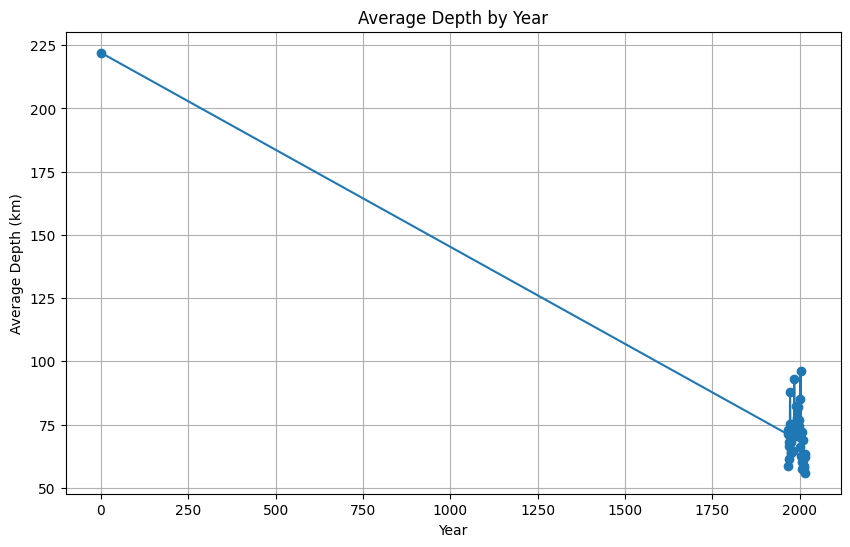

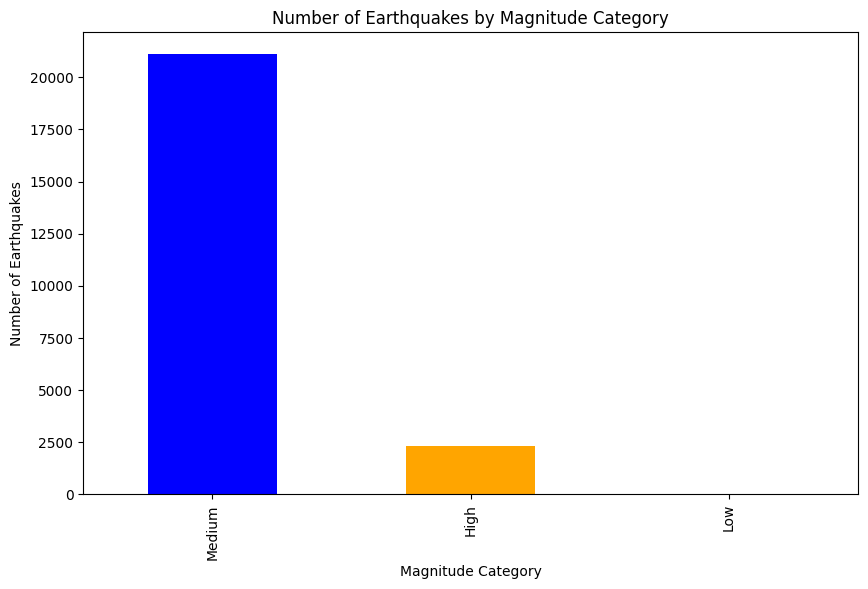

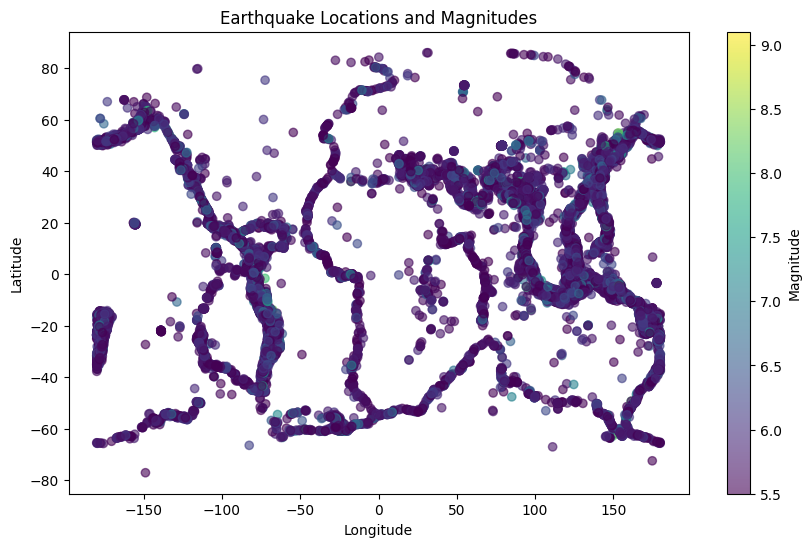

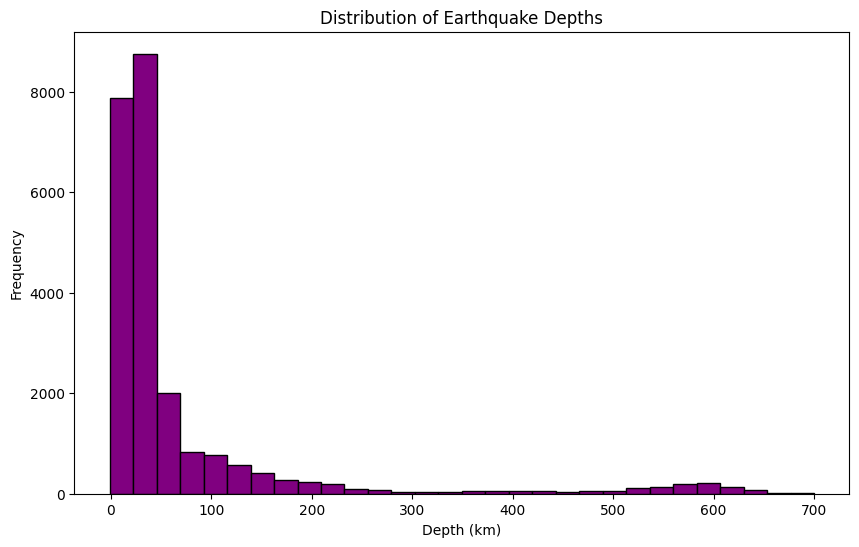

In [83]:
# Line Plot: Average Depth by Year
line_plot_data = df.groupby('Year')['Depth'].mean()
plt.figure(figsize=(10, 6))
plt.plot(line_plot_data, marker='o')
plt.title('Average Depth by Year')
plt.xlabel('Year')
plt.ylabel('Average Depth (km)')
plt.grid(True)
plt.show()

# Bar Plot: Number of Earthquakes by Magnitude Category
bar_plot_data = df['Magnitude_Category'].value_counts()
plt.figure(figsize=(10, 6))
bar_plot_data.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Earthquakes by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Number of Earthquakes')
plt.show()

# Scatter Plot: Latitude vs. Longitude with Magnitude as Color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Magnitude'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Magnitude')
plt.title('Earthquake Locations and Magnitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Histogram: Distribution of Depths
plt.figure(figsize=(10, 6))
plt.hist(df['Depth'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

5. (L11 – 2 ქულა) გამოიყენეთ თარიღებთან სამუშაო მინიმუმ 2 განსხვავებული ფუნქცია/ტრანსფორმაცია
სურვილისამებრ (მაგ. resample ფუნქცია).

In [86]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 1. Extract Year and Month from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 2. Resample to get the monthly mean depth
monthly_mean_depth = df.resample('M', on='Date')['Depth'].mean()

# Display the transformed dataframe and the resampled data
print("Transformed DataFrame with Year and Month extracted:")
print(df.head())

print("\nMonthly Mean Depth:")
print(monthly_mean_depth.head())

Transformed DataFrame with Year and Month extracted:
        Date  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  Magnitude Error  ...  \
0                     NaN        6.0             MW              NaN  ...   
1                     NaN        5.8             MW              NaN  ...   
2                     NaN        6.2             MW              NaN  ...   
3                     NaN        5.8             MW              NaN  ...   
4                     NaN        5.8             MW              NaN  ...   

   Root Mean Square            ID  Source  Location Source  Magnitude